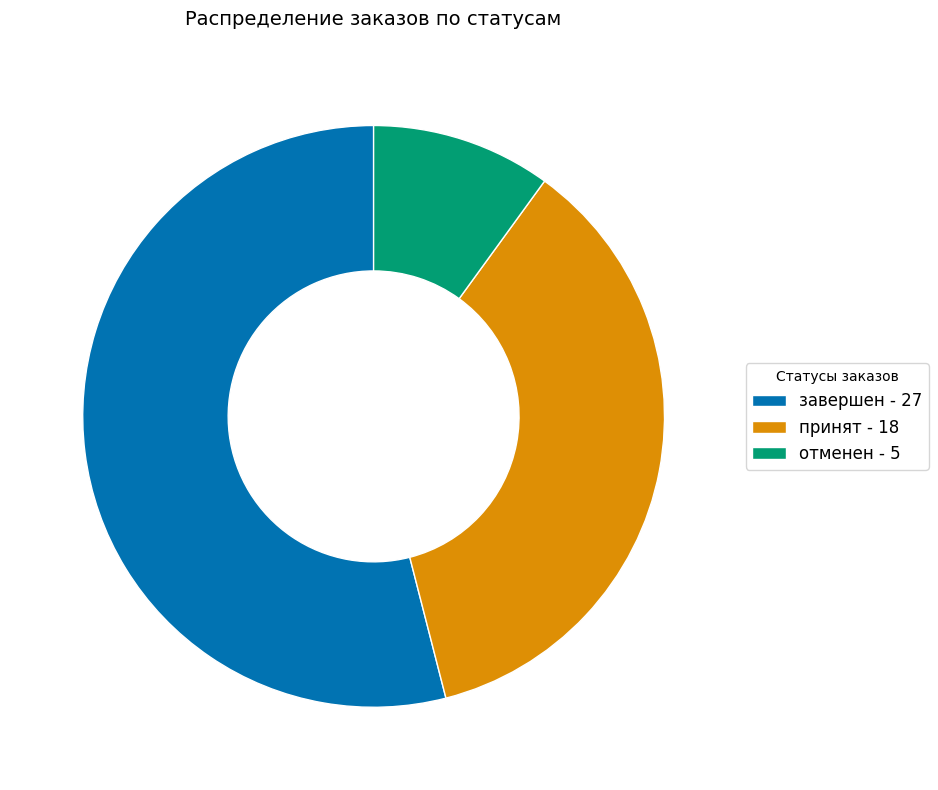

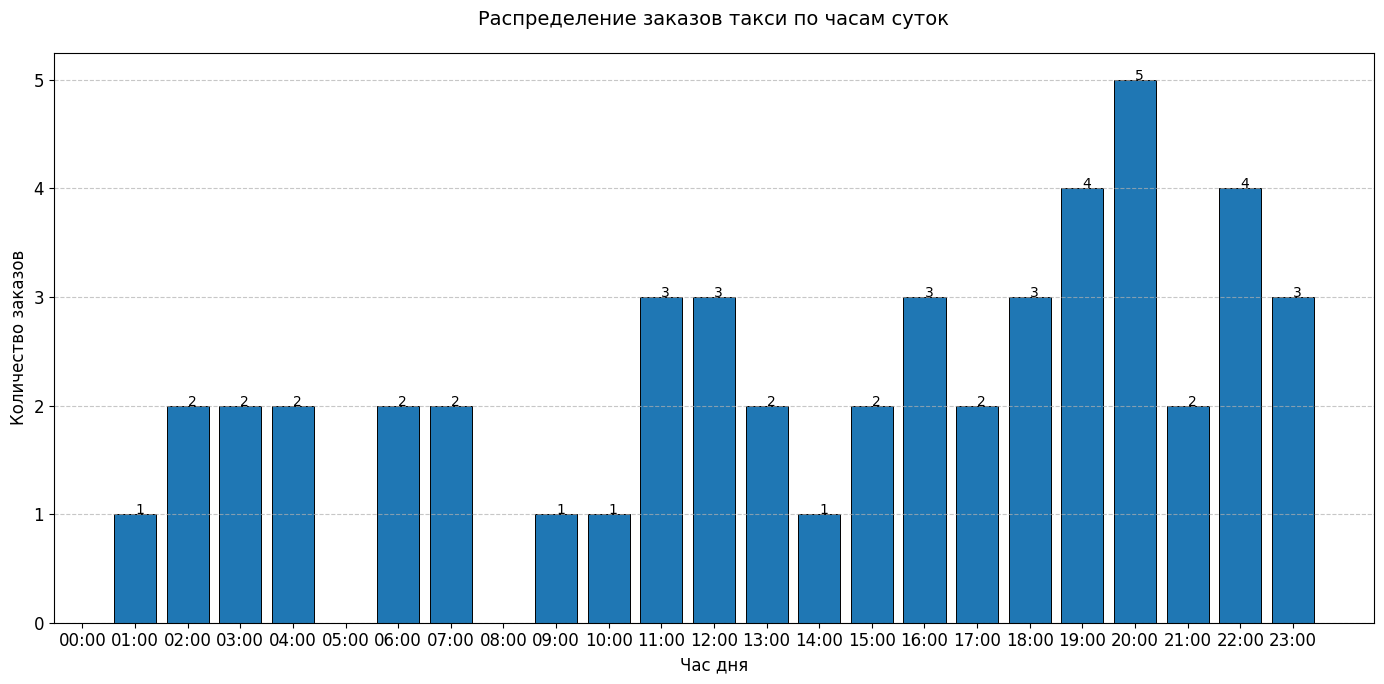

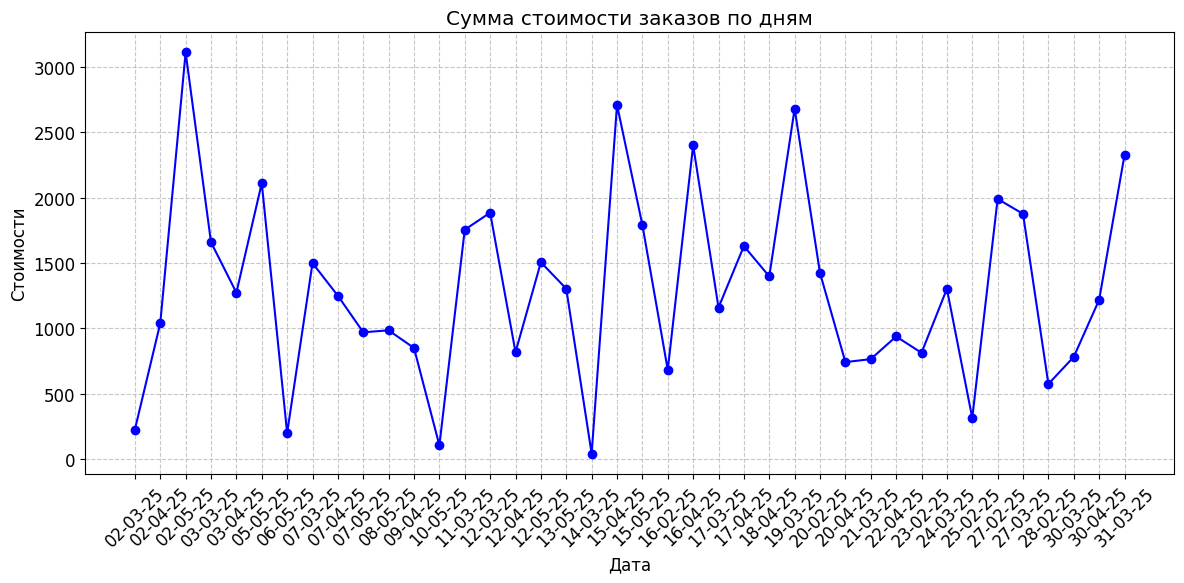

In [3]:
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

try:
    # Подключение к базе данных
    conn = psycopg2.connect(
        user='bk_465842_2025',
        password='bk_465842',
        host='postgrepro.dc-edu.ru',
        port='5432',
        database='dbstud'
    )
    cursor = conn.cursor()
    def first_visualisation():

      cursor.execute("""
      SELECT
          status,
          COUNT(*) as count
      FROM order_details
      GROUP BY status
      ORDER BY count DESC
      """)

      data = cursor.fetchall()
      statuses = [item[0] for item in data]
      counts = [item[1] for item in data]

      colors = sns.color_palette("colorblind")[0:len(statuses)]

      fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

      wedges, texts = ax.pie(
        counts,
        colors=colors,
        startangle=90,
        wedgeprops=dict(width=0.5, edgecolor='w')
      )

      plt.setp(texts, size=12)

      legend_labels = [f"{s} - {c}" for s, c in zip(statuses, counts)]
      ax.legend(
          wedges, legend_labels,
          title="Статусы заказов",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12
      )
      ax.set_title('Распределение заказов по статусам', pad=20, fontsize=14)

      plt.tight_layout()
      plt.savefig('order_status_distribution.png', dpi=300, bbox_inches='tight')
      plt.show()

    def second_visualisation():
      plt.rcParams['font.size'] = 12
      plt.rcParams['figure.figsize'] = (14, 7)  # Увеличим размер графика

      cursor.execute("""
        SELECT
            EXTRACT(HOUR FROM TO_TIMESTAMP(order_datetime, 'DD:MM:YY HH24:MI:SS'))::INTEGER as hour,
            COUNT(*)::INTEGER as order_count
        FROM taxi_order
        GROUP BY hour
        ORDER BY hour
        """)
      hours = []
      counts = []
      for hour, count in cursor.fetchall():
          hours.append(int(hour))
          counts.append(count)

      fig, ax = plt.subplots()

      bars = ax.bar(
            hours,
            counts,
            edgecolor='black',
            linewidth=0.7
        )

      for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2.,
                height,
                f'{int(height)}',
                fontsize=10,
            )

      ax.set_title('Распределение заказов такси по часам суток', pad=20, fontsize=14)
      ax.set_xlabel('Час дня', fontsize=12)
      ax.set_ylabel('Количество заказов', fontsize=12)

      ax.set_xticks(range(24))
      ax.set_xticklabels([f'{h:02d}:00' for h in range(24)])

      ax.yaxis.grid(True, linestyle='--', alpha=0.7)

      plt.tight_layout()
      plt.savefig('orders_by_hour.png', dpi=300, bbox_inches='tight')
      plt.show()

    def third_visualisation():
      ex_str = """
        SELECT
            TO_CHAR(TO_TIMESTAMP(order_datetime, 'DD:MM:YY HH24:MI:SS'), 'DD-MM-YY') AS day_month_year,
            SUM(order_details.cost) AS total_cost
        FROM taxi_order
        JOIN order_details ON taxi_order.order_id = order_details.order_id
        GROUP BY day_month_year
        ORDER BY day_month_year;
        """

      cursor.execute(ex_str)
      data = cursor.fetchall()

      days = [day for day, cost in data]
      costs = [cost for day, cost in data]

      plt.figure(figsize=(12, 6))
      plt.plot(days, costs, marker='o', linestyle='-', color='blue')
      plt.title('Сумма стоимости заказов по дням')
      plt.xlabel('Дата')
      plt.ylabel('Стоимости')
      plt.xticks(rotation=45)
      plt.grid(True, linestyle='--', alpha=0.7)
      plt.tight_layout()
      plt.show()


    first_visualisation()
    second_visualisation()
    third_visualisation()

except Exception as e:
    print(f"Ошибка: {e}")
finally:
    if 'cursor' in locals():
        cursor.close()
    if 'conn' in locals():
        conn.close()